## Modules Required 

In [42]:
import pandas as pd
import zipfile as zp
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import  scale

## Data Input

In [43]:
!wget -cq https://www.dropbox.com/s/1kasx9z1g4qdxjy/Solar%20Farm%20PMs%20and%20WS%20Data.zip

In [44]:
files = zp.ZipFile('/content/Solar Farm PMs and WS Data.zip')
files.namelist()
aug = files.open('Solar Farm PMs and WS Data/Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.OCT2020.csv')
df_aug = pd.read_csv( aug )

In [45]:
df_aug.DestinationMeasurementName

0          Active Energy Delivered
1          Active Energy Delivered
2          Active Energy Delivered
3          Active Energy Delivered
4          Active Energy Delivered
                    ...           
1399709                 Wind Speed
1399710                 Wind Speed
1399711                 Wind Speed
1399712                 Wind Speed
1399713                 Wind Speed
Name: DestinationMeasurementName, Length: 1399714, dtype: object

In [46]:
pd.to_datetime( '1/07/2021 1:15:00.00 PM' , format = '%d/%m/%Y %I:%M:%S.%f %p' )

Timestamp('2021-07-01 13:15:00')

In [47]:
files.namelist()

['Solar Farm PMs and WS Data/',
 '__MACOSX/._Solar Farm PMs and WS Data',
 'Solar Farm PMs and WS Data/Digital Twin PME Data Export - Solar Farm PMs and WS.PME_FEB2021.csv',
 '__MACOSX/Solar Farm PMs and WS Data/._Digital Twin PME Data Export - Solar Farm PMs and WS.PME_FEB2021.csv',
 'Solar Farm PMs and WS Data/Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.MAR2021.csv',
 '__MACOSX/Solar Farm PMs and WS Data/._Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.MAR2021.csv',
 'Solar Farm PMs and WS Data/Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.JUL2021.csv',
 '__MACOSX/Solar Farm PMs and WS Data/._Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.JUL2021.csv',
 'Solar Farm PMs and WS Data/Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.JUN2021.csv',
 '__MACOSX/Solar Farm PMs and WS Data/._Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.JUN2021.csv',
 'Solar Farm PMs and WS Data/Digit

In [48]:
def get_weather_data(df ):
    return df[ df.PME_SourceName == 'WP_SF_MVPS4.WS1'].pivot_table(  index = 'TimestampLocal' , columns='PME_MeasurementName' , values =  'PME_Value' )

In [49]:
def get_active_power(df, measurement_needed):
    dat =  df[  df.PME_MeasurementName == measurement_needed ].pivot_table( index = 'TimestampLocal' , columns='PME_SourceName' , values =  'PME_Value' )
    return dat[['WP_SF_MVPS1.PM1' , 'WP_SF_MVPS2.PM1' , 'WP_SF_MVPS3.PM1' , 'WP_SF_MVPS4.PM1' ]]
    #return dat

In [50]:
dfs = []

for index,each in enumerate(files.namelist()):
  if( (index % 2 == 0) & (index!=0)  ):
    print(index,each)
    f = files.open(each)
    df = pd.read_csv(f)
    weather_data =  get_weather_data(df)
    active_power =   get_active_power(df, 'Active Power')
    merged = pd.merge(active_power,weather_data,how = 'left' , on ='TimestampLocal')
    merged.reset_index(inplace=True)
    merged['TimestampLocal'] =  pd.to_datetime( merged['TimestampLocal'] , format = '%d/%m/%Y %I:%M:%S.%f %p' )  #merged['TimestampLocal'].astype('datetime64[ns]')
    merged.set_index('TimestampLocal' , inplace=True)
    dfs.append(merged)



2 Solar Farm PMs and WS Data/Digital Twin PME Data Export - Solar Farm PMs and WS.PME_FEB2021.csv
4 Solar Farm PMs and WS Data/Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.MAR2021.csv
6 Solar Farm PMs and WS Data/Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.JUL2021.csv
8 Solar Farm PMs and WS Data/Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.JUN2021.csv
10 Solar Farm PMs and WS Data/Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.AUG2020.csv
12 Solar Farm PMs and WS Data/Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.MAY2021.csv
14 Solar Farm PMs and WS Data/Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.JAN2021.csv
16 Solar Farm PMs and WS Data/Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.OCT2020.csv
18 Solar Farm PMs and WS Data/Digital Twin PME Data Export - Solar Farm PMs and WS.PME_DataLog.SEP2020.csv
20 Solar Farm PMs and WS Data/Digital Twin PME Da

In [51]:
main = pd.concat(dfs)
main.drop_duplicates( keep = 'first' , inplace = True )
main.isna().sum()
main.sort_index().head(5)


,WP_SF_MVPS1.PM1,WP_SF_MVPS2.PM1,WP_SF_MVPS3.PM1,WP_SF_MVPS4.PM1,AVG in-plane irradiance,Ambient Temperature Celsius,Back-of-Module Temperature (deg C),Back-of-Module Temperature 2 (deg C),Irradiance Global (W/m^2),Irradiance Plane-of-Array (W/m^2),Rainfall (mm),Weather Atmospheric Pressure,Weather Relative Humidity,Wind Direction (Hour Interval),Wind Speed
TimestampLocal,,,,,,,,,,,,,,,
2020-08-01 00:15:00,0.0,0.0,0.0,0.0,0.0,8.4,5.9,5.5,0.0,0.0,76.4,1013.0,81.0,307.0,1.0
2020-08-01 00:30:00,0.0,0.0,0.0,0.0,0.0,8.3,5.8,5.4,0.0,0.0,76.4,1013.0,82.0,331.0,3.0
2020-08-01 00:45:00,0.0,0.0,0.0,0.0,0.0,8.2,5.8,5.3,0.0,0.0,76.4,1013.0,82.0,337.0,2.0
2020-08-01 01:00:00,0.0,0.0,0.0,0.0,0.0,8.0,5.3,4.8,0.0,0.0,76.4,1013.0,82.0,315.0,3.0
2020-08-01 01:15:00,0.0,0.0,0.0,0.0,0.0,8.0,5.5,5.1,0.0,0.0,76.4,1013.0,82.0,329.0,3.0


In [52]:
main.reset_index().dtypes

TimestampLocal                          datetime64[ns]
WP_SF_MVPS1.PM1                                float64
WP_SF_MVPS2.PM1                                float64
WP_SF_MVPS3.PM1                                float64
WP_SF_MVPS4.PM1                                float64
AVG in-plane irradiance                        float64
Ambient Temperature Celsius                    float64
Back-of-Module Temperature (deg C)             float64
Back-of-Module Temperature 2 (deg C)           float64
Irradiance Global (W/m^2)                      float64
Irradiance Plane-of-Array (W/m^2)              float64
Rainfall (mm)                                  float64
Weather Atmospheric Pressure                   float64
Weather Relative Humidity                      float64
Wind Direction (Hour Interval)                 float64
Wind Speed                                     float64
dtype: object

## Reading data saved 

In [53]:
data = main.copy( deep = True )

print( "-" * 100 + '\n' ,   'Original Data Frame','\n' , "-" * 100  )
display(data.head(5))
sorted  = data.sort_index()
print( "-" * 100 + '\n' ,   'Sorted  Data Frame','\n' , "-" * 100  )
sorted.head(5)


----------------------------------------------------------------------------------------------------
 Original Data Frame 
 ----------------------------------------------------------------------------------------------------


,WP_SF_MVPS1.PM1,WP_SF_MVPS2.PM1,WP_SF_MVPS3.PM1,WP_SF_MVPS4.PM1,AVG in-plane irradiance,Ambient Temperature Celsius,Back-of-Module Temperature (deg C),Back-of-Module Temperature 2 (deg C),Irradiance Global (W/m^2),Irradiance Plane-of-Array (W/m^2),Rainfall (mm),Weather Atmospheric Pressure,Weather Relative Humidity,Wind Direction (Hour Interval),Wind Speed
TimestampLocal,,,,,,,,,,,,,,,
2021-02-01 10:00:00,458.095581,465.180786,467.802765,-0.062771,245.0,17.3,20.0,21.4,281.0,245.0,3700.6,1002.0,81.0,190.0,1.0
2021-02-01 22:00:00,0.000000,0.000000,0.000000,0.000000,0.0,15.0,13.8,12.9,0.0,0.0,3700.6,1005.0,75.0,191.0,6.0
2021-02-01 10:15:00,555.626343,567.304810,569.185608,-0.045667,321.0,17.5,20.9,22.8,352.0,321.0,3700.6,1002.0,80.0,215.0,1.0
2021-02-01 22:15:00,0.000000,0.000000,0.000000,0.000000,0.0,14.7,13.5,12.3,0.0,0.0,3700.6,1005.0,75.0,210.0,2.0
2021-02-01 10:30:00,713.596558,744.530334,747.357361,-0.021083,424.0,17.7,21.4,24.0,425.0,424.0,3700.6,1002.0,79.0,240.0,2.0


----------------------------------------------------------------------------------------------------
 Sorted  Data Frame 
 ----------------------------------------------------------------------------------------------------


,WP_SF_MVPS1.PM1,WP_SF_MVPS2.PM1,WP_SF_MVPS3.PM1,WP_SF_MVPS4.PM1,AVG in-plane irradiance,Ambient Temperature Celsius,Back-of-Module Temperature (deg C),Back-of-Module Temperature 2 (deg C),Irradiance Global (W/m^2),Irradiance Plane-of-Array (W/m^2),Rainfall (mm),Weather Atmospheric Pressure,Weather Relative Humidity,Wind Direction (Hour Interval),Wind Speed
TimestampLocal,,,,,,,,,,,,,,,
2020-08-01 00:15:00,0.0,0.0,0.0,0.0,0.0,8.4,5.9,5.5,0.0,0.0,76.4,1013.0,81.0,307.0,1.0
2020-08-01 00:30:00,0.0,0.0,0.0,0.0,0.0,8.3,5.8,5.4,0.0,0.0,76.4,1013.0,82.0,331.0,3.0
2020-08-01 00:45:00,0.0,0.0,0.0,0.0,0.0,8.2,5.8,5.3,0.0,0.0,76.4,1013.0,82.0,337.0,2.0
2020-08-01 01:00:00,0.0,0.0,0.0,0.0,0.0,8.0,5.3,4.8,0.0,0.0,76.4,1013.0,82.0,315.0,3.0
2020-08-01 01:15:00,0.0,0.0,0.0,0.0,0.0,8.0,5.5,5.1,0.0,0.0,76.4,1013.0,82.0,329.0,3.0


In [54]:
fig = px.line( data_frame = sorted , x = sorted.index ,  y = 'WP_SF_MVPS2.PM1' )
fig.show()

## Trying K-means for Anamoly detection 

In [55]:
b = np.where((main.corr() > 0.8) & (main.corr() != 0.8))

In [56]:
sorted = main.sort_index()

In [57]:
def find_clusters( number_of_obs , column_list ):
  one_day = sorted.iloc[ :number_of_obs, column_list ]
  one_day.fillna(method= 'backfill' , inplace= True )

  #plt.hist( one_day['AVG in-plane irradiance'])
  #plt.show()

  print('\n\n')
  display(one_day.head(3))
  print('\n\n')
  
  plt.figure( figsize=(20,8) )
  for each in one_day.columns:
    plt.scatter(    one_day.index ,  one_day[each] , label = each )
  plt.show()

  print('\n\n')
  
  scaled_oneday =  scale(one_day)
  plt.figure( figsize=(20,8) )
  for each in np.arange(one_day.shape[1]):
    plt.scatter(    one_day.index ,  scaled_oneday[:,each] )
  plt.show()

,WP_SF_MVPS1.PM1,Ambient Temperature Celsius
TimestampLocal,,
2020-08-01 00:15:00,0.0,8.4
2020-08-01 00:30:00,0.0,8.3
2020-08-01 00:45:00,0.0,8.2


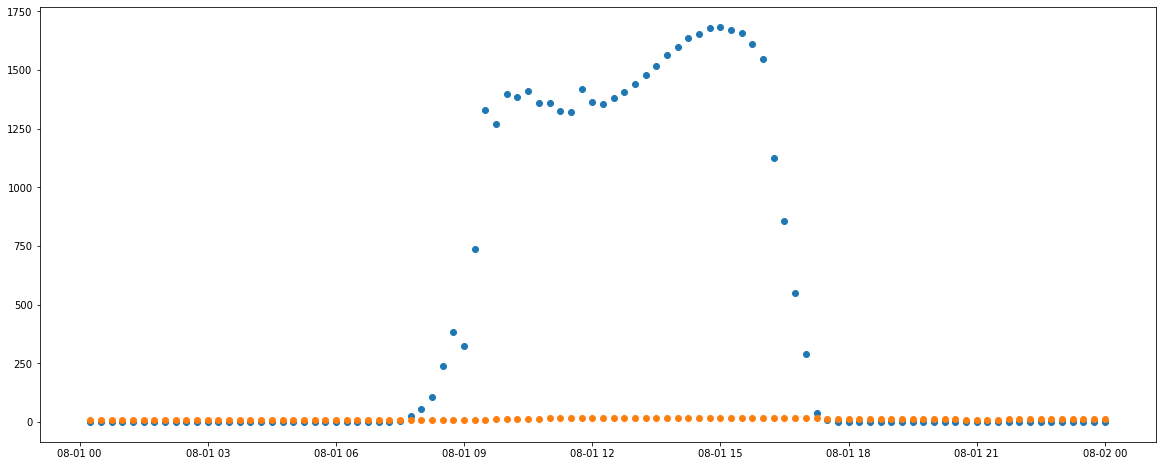

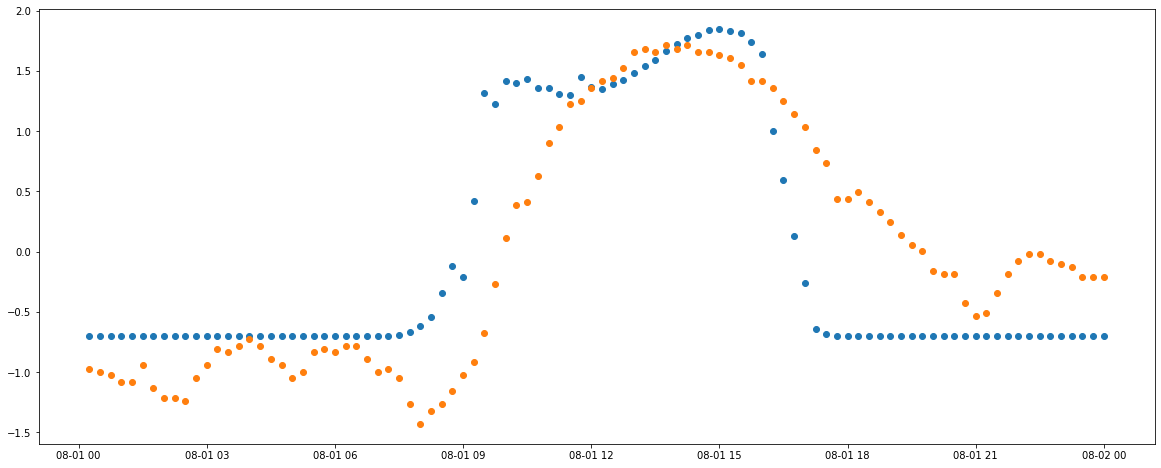

In [58]:
find_clusters( 96 , [0,5] )

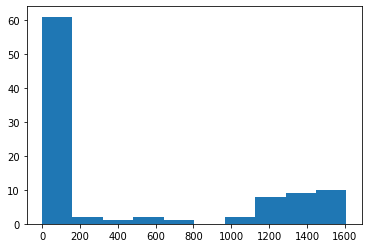

,WP_SF_MVPS1.PM1,AVG in-plane irradiance,Ambient Temperature Celsius
TimestampLocal,,,
2020-08-01 00:15:00,0.0,0.0,8.4
2020-08-01 00:30:00,0.0,0.0,8.3
2020-08-01 00:45:00,0.0,0.0,8.2


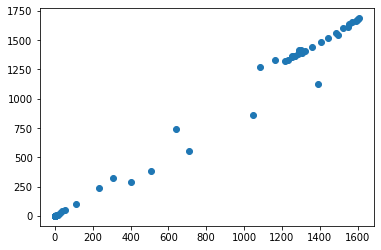

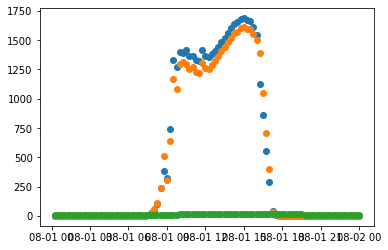

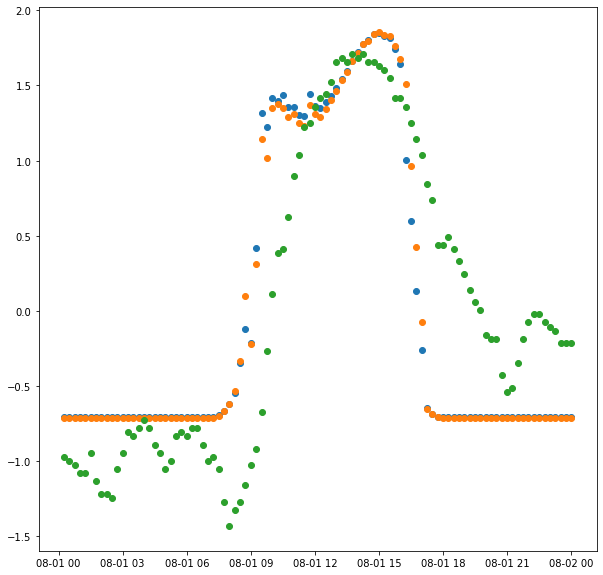

In [59]:
one_day = sorted.iloc[ :96, [0,4,5] ]
one_day.fillna(method= 'backfill' , inplace= True )

plt.hist( one_day['AVG in-plane irradiance'])
plt.show()

print('\n\n')
display(one_day.head(3))
print('\n\n')

plt.scatter(    one_day['AVG in-plane irradiance'] ,  one_day['WP_SF_MVPS1.PM1'] )
plt.show()
print('\n\n')

fig = px.scatter( data_frame =  one_day , x = one_day.index , y = 'AVG in-plane irradiance'   )
fig.show()
print('\n\n')


plt.scatter(    one_day.index ,  one_day['WP_SF_MVPS1.PM1'] )
plt.scatter(    one_day.index ,  one_day['AVG in-plane irradiance'] )
plt.scatter(    one_day.index ,  one_day['Ambient Temperature Celsius'] )
plt.show()

print('\n\n')

scaled_oneday =  scale(one_day)

plt.figure(figsize=(10,10))
plt.scatter(    one_day.index ,  scaled_oneday[:,0] )
plt.scatter(    one_day.index ,  scaled_oneday[:,1] )
plt.scatter(   one_day.index ,  scaled_oneday[:,2] )
plt.show()

### How is temparature zero when there the Ambient temparature is good .? 

In [60]:
'''
Plottting 'AVG in-plane irradiance' vs 'WP_SF_MVPS1.PM1' 
'''
fig = px.scatter( data_frame = one_day , x = 'AVG in-plane irradiance' ,  y = 'WP_SF_MVPS1.PM1' )
fig.show()

'''
KMEANS STARTS 
'''

from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0)
one_day['cluster'] = kmeans.fit_predict(one_day[['WP_SF_MVPS1.PM1', 'AVG in-plane irradiance']])

centroids = kmeans.cluster_centers_
# cen_x = [i[0] for i in centroids] 
# cen_y = [i[1] for i in centroids]
# ## add to df
# one_day['cen_x'] = one_day.cluster.map({0:cen_x[0], 1:cen_x[1],2:cen_x[2], 3:cen_x[3]})
# one_day['cen_y'] = one_day.cluster.map({0:cen_y[0], 1:cen_y[1],2:cen_y[2], 3:cen_y[3]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
one_day['c'] = one_day.cluster.map({0:colors[0], 1:colors[1] , 2:colors[2]})


px.scatter( x =  one_day['AVG in-plane irradiance'], y =  one_day['WP_SF_MVPS1.PM1'], color =one_day.c  )



In [61]:
%pdef px.scatter

 px.scatter(data_frame=None, x=None, y=None, color=None, symbol=None, size=None, hover_name=None, hover_data=None, custom_data=None, text=None, facet_row=None, facet_col=None, facet_col_wrap=0, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=(0 items) {}, labels=(0 items) {}, color_discrete_sequence=None, color_discrete_map=(0 items) {}, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, symbol_sequence=None, symbol_map=(0 items) {}, opacity=None, size_max=None, marginal_x=None, marginal_y=None, trendline=None, trendline_color_override=None, log_x=False, log_y=False, range_x=None, range_y=None, render_mode='auto', title=None, template=None, width=None, height=None)
 

## Other( this code is to find the number of panels required to produce a particular output) 


In [62]:
Total_output_required = 20000
num_of_cells_producing_20kw = 300  # @ 70% efficiency
num_of_cells_producing_25kw = 600  # @ 70% efficiency
efficiency_of_20kw_cell = 70
efficiency_of_25kw_cell = 80

In [63]:
actual_produced = ( num_of_cells_producing_20kw * 20 * (efficiency_of_20kw_cell/100) )   +  (num_of_cells_producing_25kw * 25 * (efficiency_of_25kw_cell/100))
print( f'Actuall Output produced  = {actual_produced} ')

Actuall Output produced  = 16200.0 


In [64]:
def number_of_cells_producing_20k( actual_produced , Total_output_required , efficiency = efficiency_of_20kw_cell  ):
  print('-'*100)
  print(f'Number of kw needed to acheive targed = {Total_output_required - actual_produced}')
  cells = np.ceil(( Total_output_required - actual_produced ) / (20 * ( efficiency / 100)))
  print(f'Number of 20kw producing cells required to acheive target = { cells } ' )
  
def number_of_cells_producing_25k( actual_produced , Total_output_required , efficiency = efficiency_of_25kw_cell ):
  print('-'*100)
  print(f'Number of kw needed to acheive targed = {Total_output_required - actual_produced}')
  cells = np.ceil(( Total_output_required - actual_produced ) / (25 * ( efficiency / 100)))
  print(f'Number of 25kw producing cells required to acheive target = { cells } ' )

In [65]:
number_of_cells_producing_20k(actual_produced ,  Total_output_required  )
number_of_cells_producing_25k(actual_produced ,  Total_output_required  )


----------------------------------------------------------------------------------------------------
Number of kw needed to acheive targed = 3800.0
Number of 20kw producing cells required to acheive target = 272.0 
----------------------------------------------------------------------------------------------------
Number of kw needed to acheive targed = 3800.0
Number of 25kw producing cells required to acheive target = 190.0 


## Implementing Low Pass Filter to Active Power. 

In [66]:
sorted.head()

,WP_SF_MVPS1.PM1,WP_SF_MVPS2.PM1,WP_SF_MVPS3.PM1,WP_SF_MVPS4.PM1,AVG in-plane irradiance,Ambient Temperature Celsius,Back-of-Module Temperature (deg C),Back-of-Module Temperature 2 (deg C),Irradiance Global (W/m^2),Irradiance Plane-of-Array (W/m^2),Rainfall (mm),Weather Atmospheric Pressure,Weather Relative Humidity,Wind Direction (Hour Interval),Wind Speed
TimestampLocal,,,,,,,,,,,,,,,
2020-08-01 00:15:00,0.0,0.0,0.0,0.0,0.0,8.4,5.9,5.5,0.0,0.0,76.4,1013.0,81.0,307.0,1.0
2020-08-01 00:30:00,0.0,0.0,0.0,0.0,0.0,8.3,5.8,5.4,0.0,0.0,76.4,1013.0,82.0,331.0,3.0
2020-08-01 00:45:00,0.0,0.0,0.0,0.0,0.0,8.2,5.8,5.3,0.0,0.0,76.4,1013.0,82.0,337.0,2.0
2020-08-01 01:00:00,0.0,0.0,0.0,0.0,0.0,8.0,5.3,4.8,0.0,0.0,76.4,1013.0,82.0,315.0,3.0
2020-08-01 01:15:00,0.0,0.0,0.0,0.0,0.0,8.0,5.5,5.1,0.0,0.0,76.4,1013.0,82.0,329.0,3.0


# Procedure 

1. Find Rolling mean , Rolling Std  given w 
2. Shift power by -1 to compare TH and TL 
3. If any item , record it and ( index + 1)
4.drop the item and repeat the process untill we dont have any item that is an outlier. 

In [446]:
import pandas as pd 
import numpy as np



def find_TH_TL(df , w):
  global lenght_of_shift
  TH = df.rolling(window = w  ).mean() +  ( 3 * df.rolling(window = w ).std() ) 
  TL = df.rolling(window = w  ).mean() -  ( 3 * df.rolling(window = w ).std() ) 
  #Val_TH.append(TH)
  #Val_TL.append(TL)
  Val_centerMeas.append(df.rolling(window = w  ).mean())
  concated  =  pd.concat( [df,TH,TL] , axis = 1)
  concated.columns = ['Power','TH','TL']
  concated.TH = concated.TH.shift( +1)
  concated.TL = concated.TL.shift( +1 )
  Val_TH.append(concated.TH)
  Val_TL.append(concated.TL)
  print(concated)
  if len(concated[(concated.Power > concated.TH)| (concated.Power < concated.TL ) ]):
    check = list(concated[(concated.Power > concated.TH) | (concated.Power < concated.TL )].index)[0]
    index_of_outliers.append( check  )
    df.drop( check  , axis = 'index'  , inplace = True  )
    find_TH_TL( df , w)
  else:
    print('All outliers detected')
    return df



In [447]:
  #median absolute deviation
  mad = lambda x: np.median(np.fabs(x - np.median(x)))

In [448]:
def find_median_mad_Anomaly(df , w):
  global lenght_of_shift
  TH = df.rolling(window = w  ).median() +  ( 3 * df.rolling(window = w ).apply(mad,raw=True)) 
  TL = df.rolling(window = w  ).median() -  ( 3 * df.rolling(window = w ).apply(mad,raw=True)) 
  
  Val_centerMeas.append(df.rolling(window = w  ).median())
  
  concated  =  pd.concat( [df,TH,TL] , axis = 1)
  concated.columns = ['Power','TH','TL']
  print(concated)
  concated.TH = concated.TH.shift( +1)
  concated.TL = concated.TL.shift( +1 )
  Val_TH.append(concated.TH)
  Val_TL.append(concated.TL)

  Anomalies = concated[(concated.Power > concated.TH)| (concated.Power < concated.TL )]
  #print(list(Anomalies.index))
  index_of_outliers[:]=list(Anomalies.index)
  #print(index_of_outliers) 
  #if len(concated[(concated.Power > concated.TH)| (concated.Power < concated.TL ) ]):
  #  check = list(concated[(concated.Power > concated.TH) | (concated.Power < concated.TL )].index)[0]
    
  #  print(check)
  #  index_of_outliers.append( check  )
    #find_median_mad_Anomaly( df , w)
    #find_TH_TL( df , w)
  # else:
  #   print('All outliers detected')
  #   return df
  print('All outliers detected')
  return df

## Testing the Function 

In [490]:
np.random.seed(123)
df = pd.Series(np.random.normal(size=200))

# Create a few outliers (3 of them, at index locations 10, 55, 80)
df[[13, 55, 80]] = 10.   
index_of_outliers = []
Val_TH = []
Val_TL = []
Val_centerMeas=[]
coopy = df.copy( deep=True  )
#find_TH_TL(df , 12 )
find_median_mad_Anomaly(df , 12)
#print( 'outliers-Detected = '  , index_of_outliers) 
fig = px.scatter(  x = coopy.index , y = coopy )
#fig = plt.scatter( x =  index_of_outliers ,  y =  coopy.loc[index_of_outliers])
index_of_outliers
fig.add_scatter( x =  index_of_outliers ,  y =  coopy.loc[index_of_outliers] , mode='markers', name="Anomalies" )
#suthar
fig.add_scatter( x = list(Val_TH)[0].index ,  y = list(Val_TH)[0] , mode='lines', marker=dict(size=20, color="MediumPurple") ,  name="TH"  )
#fig.add_scatter( x = list(Val_TH)[0].index ,  y = list(Val_TL)[0] , mode='lines', marker=dict(size=20, color="LightSeaGreen"),  name="TL"   )
fig.add_scatter( x = list(Val_TH)[0].index ,  y = list(Val_TL)[0] , mode='lines', marker=dict(size=20, color="LightSeaGreen"), fill='tonexty', fillcolor='rgba(0,0,20,0.1)', name="TL", hoveron='points')
fig.add_scatter( x = list(Val_centerMeas)[0].index ,  y = list(Val_centerMeas)[0] , mode='lines', marker=dict(size=20, color="blue"),  name="CenterMeasure"  )

fig.show() 


        Power        TH        TL
0   -1.085631       NaN       NaN
1    0.997345       NaN       NaN
2    0.282978       NaN       NaN
3   -1.506295       NaN       NaN
4   -0.578600       NaN       NaN
..        ...       ...       ...
195 -3.231055  1.042259 -1.523201
196 -0.269293  0.956728 -1.352139
197 -0.110851  0.798285 -1.035254
198 -0.341262  0.679541 -0.916509
199 -0.217946  0.570192 -0.807161

[200 rows x 3 columns]
All outliers detected


In [450]:
#index_of_outliers

In [451]:
list(Val_TH)[0]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
195    0.848698
196    1.042259
197    0.956728
198    0.798285
199    0.679541
Name: TH, Length: 200, dtype: float64

In [452]:
lenght_of_shift = 0 
some_data = np.random.randint(1,10,10  )
some_data[4] = 50
some_data[9] = 55
test_Data = pd.Series( some_data )
index_of_outliers = []
coopy = test_Data.copy( deep=True  )
#find_TH_TL(test_Data , 4 )
find_median_mad_Anomaly(test_Data , 4)
print( 'outliers-Detected = '  , index_of_outliers ) 
fig = px.scatter(  x = coopy.index , y = coopy )
fig.add_scatter( x =  index_of_outliers ,  y =  coopy.loc[index_of_outliers] , mode='markers'  )
fig.show()

   Power    TH   TL
0      6   NaN  NaN
1      4   NaN  NaN
2      7   NaN  NaN
3      5   8.5  2.5
4     50  10.5  1.5
5      2  13.5 -1.5
6      7  13.5 -1.5
7      1  13.5 -4.5
8      4   7.5 -1.5
9     55  14.5 -3.5
All outliers detected
outliers-Detected =  [4, 9]


In [459]:

def find_dist( observations  , col_num  , w = 12  ):
  test_Data = sorted.iloc[ : observations  ,  col_num   ]
  test_Data = test_Data[test_Data > 0  ]
  copy_of_test_data = test_Data.copy( deep = True  )
  #find_TH_TL(test_Data , w )
  find_median_mad_Anomaly(test_Data ,w) 
  
  fig = px.scatter(  x = copy_of_test_data.index , y = copy_of_test_data )
  #  fig.add_scatter( x =  index_of_outliers ,  y =  copy_of_test_data.loc[index_of_outliers]  , mode = 'markers' )
  #suthar
  fig.add_scatter( x =  index_of_outliers ,  y =  copy_of_test_data.loc[index_of_outliers] , mode='markers', marker=dict(size=12, color="red"),  name="Anomalies" )
  fig.add_scatter( x = list(Val_TH)[0].index ,  y = list(Val_TH)[0] , mode='lines', marker=dict(size=10, color="lightblue") , name="TH", hoveron='points',  )
  #fig.add_scatter( x = list(Val_TH)[0].index ,  y = list(Val_TL)[0] , mode='lines', marker=dict(size=20, color="LightSeaGreen"), fill='tonexty', fillcolor='rgba(26,150,65,0.3)', name="TL", hoveron='points',   )
  fig.add_scatter( x = list(Val_TH)[0].index ,  y = list(Val_TL)[0] , mode='lines', marker=dict(size=10, color="LightSeaGreen"), fill='tonexty', fillcolor='rgba(0,0,20,0.1)', name="TL", hoveron='points',   )
  fig.add_scatter( x = list(Val_centerMeas)[0].index ,  y = list(Val_centerMeas)[0] , mode='lines', marker=dict(size=20, color="blue"),  name="CenterMeasure"  )
  #fillcolor='LightGrey'
 
  fig.show()

In [460]:
pd.DataFrame( list(sorted.columns ) , columns=['Features'] ) 

,Features
0,WP_SF_MVPS1.PM1
1,WP_SF_MVPS2.PM1
2,WP_SF_MVPS3.PM1
3,WP_SF_MVPS4.PM1
4,AVG in-plane irradiance
5,Ambient Temperature Celsius
6,Back-of-Module Temperature (deg C)
7,Back-of-Module Temperature 2 (deg C)
8,Irradiance Global (W/m^2)
9,Irradiance Plane-of-Array (W/m^2)


In [472]:
#Irradiance 
index_of_outliers = []
Val_TH = []
Val_TL = []
Val_centerMeas=[]
find_dist(96*10  , 4 , w = 96)


                     Power      TH     TL
TimestampLocal                           
2020-08-01 07:30:00    7.0     NaN    NaN
2020-08-01 07:45:00   27.0     NaN    NaN
2020-08-01 08:00:00   56.0     NaN    NaN
2020-08-01 08:15:00  111.0     NaN    NaN
2020-08-01 08:30:00  236.0     NaN    NaN
...                    ...     ...    ...
2020-08-10 16:45:00  938.0  2487.5 -848.5
2020-08-10 17:00:00  604.0  2487.5 -848.5
2020-08-10 17:15:00  197.0  2503.5 -907.5
2020-08-10 17:30:00   26.0  2518.5 -922.5
2020-08-10 17:45:00    9.0  2530.5 -934.5

[418 rows x 3 columns]
All outliers detected


In [480]:
#Ambient Temperature Celsius 
index_of_outliers = []
Val_TH = []
Val_TL = []
Val_centerMeas=[]
find_dist(96*5  , 5 , w = 48)

                     Power     TH    TL
TimestampLocal                         
2020-08-01 00:15:00    8.4    NaN   NaN
2020-08-01 00:30:00    8.3    NaN   NaN
2020-08-01 00:45:00    8.2    NaN   NaN
2020-08-01 01:00:00    8.0    NaN   NaN
2020-08-01 01:15:00    8.0    NaN   NaN
...                    ...    ...   ...
2020-08-05 23:45:00    5.2  12.05  3.35
2020-08-06 00:00:00    5.2  12.00  3.30
2020-08-06 00:15:00    5.6  11.95  2.95
2020-08-06 00:30:00    5.7  11.60  2.60
2020-08-06 00:45:00    5.3  11.40  2.40

[471 rows x 3 columns]
All outliers detected


In [487]:
#Weather Atmospheric Pressure
index_of_outliers = []
Val_TH = []
Val_TL = []
Val_centerMeas=[]
find_dist(96*20  , 11 , w = 96)

                      Power     TH     TL
TimestampLocal                           
2020-08-01 00:15:00  1013.0    NaN    NaN
2020-08-01 00:30:00  1013.0    NaN    NaN
2020-08-01 00:45:00  1013.0    NaN    NaN
2020-08-01 01:00:00  1013.0    NaN    NaN
2020-08-01 01:15:00  1013.0    NaN    NaN
...                     ...    ...    ...
2020-08-21 00:30:00   989.0  992.0  986.0
2020-08-21 00:45:00   989.0  992.0  986.0
2020-08-21 01:00:00   989.0  992.0  986.0
2020-08-21 01:15:00   989.0  992.0  986.0
2020-08-21 01:30:00   989.0  992.0  986.0

[1887 rows x 3 columns]
All outliers detected


In [474]:
#Wind Speed 

index_of_outliers = []
Val_TH = []
Val_TL = []
Val_centerMeas=[]
find_dist(96*4, 14 , w = 48)

                     Power   TH   TL
TimestampLocal                      
2020-08-01 00:15:00    1.0  NaN  NaN
2020-08-01 00:30:00    3.0  NaN  NaN
2020-08-01 00:45:00    2.0  NaN  NaN
2020-08-01 01:00:00    3.0  NaN  NaN
2020-08-01 01:15:00    3.0  NaN  NaN
...                    ...  ...  ...
2020-08-04 23:30:00    5.0  8.0  2.0
2020-08-04 23:45:00    5.0  8.0  2.0
2020-08-05 00:00:00    5.0  8.0  2.0
2020-08-05 00:15:00    4.0  8.0  2.0
2020-08-05 00:45:00    6.0  8.0  2.0

[365 rows x 3 columns]
All outliers detected


In [467]:
#Weather Atmospheric Pressure
index_of_outliers = []
Val_TH = []
Val_TL = []
Val_centerMeas=[]
find_dist(96, 11 , w = 8)

                      Power      TH      TL
TimestampLocal                             
2020-08-01 00:15:00  1013.0     NaN     NaN
2020-08-01 00:30:00  1013.0     NaN     NaN
2020-08-01 00:45:00  1013.0     NaN     NaN
2020-08-01 01:00:00  1013.0     NaN     NaN
2020-08-01 01:15:00  1013.0     NaN     NaN
...                     ...     ...     ...
2020-08-01 23:00:00  1010.0  1010.0  1010.0
2020-08-01 23:15:00  1010.0  1010.0  1010.0
2020-08-01 23:30:00  1010.0  1010.0  1010.0
2020-08-01 23:45:00  1010.0  1010.0  1010.0
2020-08-02 00:00:00  1010.0  1010.0  1010.0

[93 rows x 3 columns]
All outliers detected


In [389]:
sorted.describe().loc[['min','max']]

,WP_SF_MVPS1.PM1,WP_SF_MVPS2.PM1,WP_SF_MVPS3.PM1,WP_SF_MVPS4.PM1,AVG in-plane irradiance,Ambient Temperature Celsius,Back-of-Module Temperature (deg C),Back-of-Module Temperature 2 (deg C),Irradiance Global (W/m^2),Irradiance Plane-of-Array (W/m^2),Rainfall (mm),Weather Atmospheric Pressure,Weather Relative Humidity,Wind Direction (Hour Interval),Wind Speed
min,-3.506043,-3.601203,-3.912139,-0.390142,0.0,2.1,0.3,-0.1,0.0,0.0,0.0,977.0,14.0,1.0,0.0
max,2529.752686,2517.786621,2550.254639,248.096558,1995.0,37.1,52.9,58.7,2143.0,2313.0,4806.6,1024.0,100.0,360.0,20.0
